# Plotting MCWD versus MAP: panels and regions

This type of plot has been explained in previous examples. Here we present a function in obrero that will plot again maximum climatological water deficit (MCWD) versus mean annual precipitation (MAP) but using panels for different world regions. We simply chose some rectangular bounded areas to create this kind of plot. Let's import obrero and the experimental MCWD module:

In [1]:
# small hack to be able to import module without install
import os
import sys
sys.path.append(os.getcwd() + '/../')

import obrero
from obrero.experimental import mcwd

And now we read data from two different experiment simulations:

In [3]:
# file name
f1 = 'data/ctl_pr_evap.nc'
f2 = 'data/pen_pr_evap.nc'
f3 = 'data/ctl_evapmean.nc'

# read as data array (ignore warnings because netCDF files are weird)
da1 = obrero.read_nc(f1, 'pr')
da2 = obrero.read_nc(f2, 'pr')
ev = obrero.read_nc(f3, 'evap')

And repeat the same steps from previous examples to get the composite values and table:

In [4]:
# sum monthly values to get yearly
map1 = da1.groupby('time.year').sum(dim='time', keep_attrs=True)
map2 = da2.groupby('time.year').sum(dim='time', keep_attrs=True)

# rename time
map1 = map1.rename({'year': 'time'})
map2 = map2.rename({'year': 'time'})

# compute mcwd
wd1 = mcwd.get_mcwd(da1, ev)
wd2 = mcwd.get_mcwd(da2, ev)

# composite
composite, table = mcwd.mcwd_composite_map(wd2, map2, wd1, map1)

This panel version of the "Malhi" plot is created using function `panel_plot_malhi()` like so:

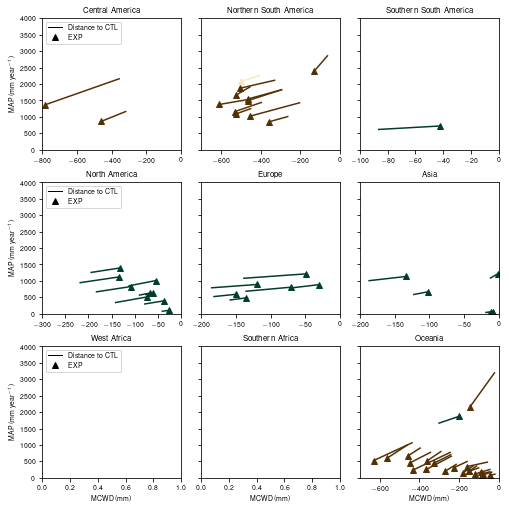

In [5]:
%matplotlib inline
fig = mcwd.panel_plot_malhi(table)

This panels plot might be useful. Notice some world regions did not have any values. This means we could create different regions.